<a href="https://colab.research.google.com/github/Pathway2008/wind-m-s-/blob/main/optu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/wind(m s)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/wind(m s)/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/wind(m s)/sample_submission.csv')

In [ ]:
def map_wind_direction(deg):
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    angles = [(0 or 360), 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5]

    # Find the closest wind direction from the given degrees
    closest_idx = min(range(len(angles)), key=lambda i: abs(angles[i] - deg))
    return directions[closest_idx]

In [ ]:
train['방위'] =train['풍향 (deg)'].apply(map_wind_direction)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
train['측정 시간대'] = label_encoder.fit_transform(train['측정 시간대'])
train['방위'] = label_encoder.fit_transform(train['방위'])
#['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE','SSW', 'SW', 'W', 'WNW', 'WSW']
train.head() #0=새벽, 1=오전 2=오후 3= 저녁

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s),방위
0,TRAIN_00000,7,2,3,13.97,287.78,9.84,76.1,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61,10
1,TRAIN_00001,8,21,1,16.94,290.85,12.14,73.3,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68,8
2,TRAIN_00002,11,1,3,9.76,283.84,5.40,74.2,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73,9
3,TRAIN_00003,12,28,1,5.27,277.30,2.71,83.5,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71,13
4,TRAIN_00004,9,26,2,17.35,290.86,12.68,74.0,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00,5


In [ ]:
label_encoder.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [ ]:
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

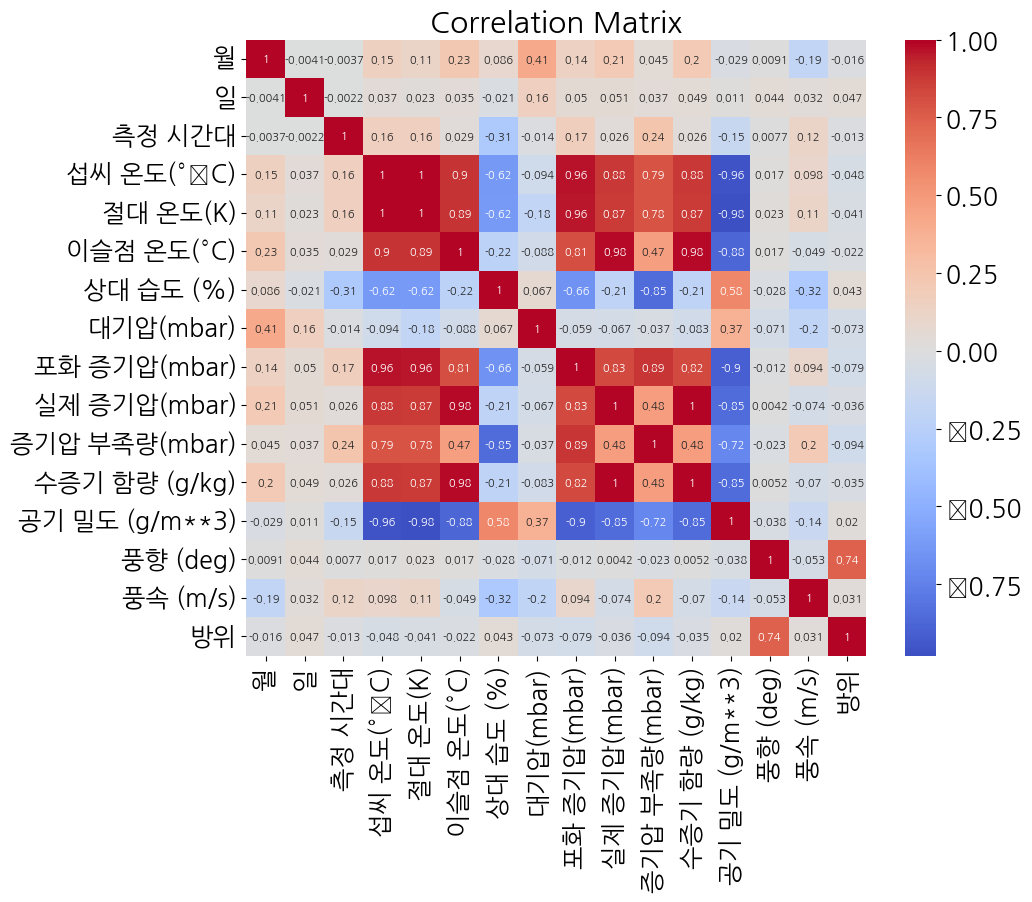

In [ ]:
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
st_train  = train.drop(['ID'],axis=1)
mn_train  = train.drop(['ID'],axis=1)

1. Standard Scaling

In [ ]:
columns = st_train.drop(columns=['측정 시간대','월', '일', '풍속 (m/s)','방위']).columns
columns

Index(['섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)',
       '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)',
       '공기 밀도 (g/m**3)', '풍향 (deg)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(st_train[columns])

In [ ]:
st_train[columns] = train_scaled
st_train.head()

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s),방위
0,7,2,3,0.482855,0.455931,0.693376,0.016942,0.231977,0.240582,0.566963,-0.082878,0.558184,-0.417949,-0.248661,1.61,10
1,8,21,1,0.843420,0.823415,1.056902,-0.157090,0.117521,0.655413,1.047176,0.175258,1.040291,-0.781995,0.004949,1.68,8
2,11,1,3,-0.028250,-0.015692,-0.008387,-0.101151,-0.149921,-0.239880,-0.192777,-0.217725,-0.191340,-0.034423,-0.360060,0.73,9
3,12,28,1,-0.573347,-0.798540,-0.433554,0.476885,2.744341,-0.637375,-0.563090,-0.535580,-0.605650,1.287678,1.041906,2.71,13
4,9,26,2,0.893195,0.824612,1.142251,-0.113582,0.650138,0.718566,1.169021,0.175258,1.145751,-0.687631,-1.863469,1.00,5


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 111.8 MB/s eta 0

In [ ]:
import pandas as pd
from pycaret.regression import setup, compare_models, finalize_model, predict_model
from sklearn.metrics import mean_absolute_error

In [ ]:
target = '풍속 (m/s)'
features = st_train.columns.drop(['풍속 (m/s)'])
regression_setup = setup(data=st_train, target=target, train_size=0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 16)"
5,Transformed train set shape,"(29264, 16)"
6,Transformed test set shape,"(7317, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(fold=5, sort='MAE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4213,0.3318,0.5759,0.8590,0.1974,0.3595,10.9840
rf,Random Forest Regressor,0.4679,0.4126,0.6423,0.8247,0.2195,0.4126,28.7040
knn,K Neighbors Regressor,0.5042,0.4933,0.7023,0.7904,0.2341,0.4267,0.5140
xgboost,Extreme Gradient Boosting,0.5521,0.5500,0.7416,0.7663,0.2486,0.4592,4.4840
lightgbm,Light Gradient Boosting Machine,0.6018,0.6363,0.7977,0.7296,0.2657,0.5204,1.0720
dt,Decision Tree Regressor,0.6153,0.8212,0.9060,0.6509,0.2979,0.4915,0.6020
gbr,Gradient Boosting Regressor,0.7734,1.0497,1.0245,0.5540,0.3254,0.6667,7.8780
huber,Huber Regressor,0.9871,1.9762,1.4058,0.1603,0.4016,0.7625,0.6340
br,Bayesian Ridge,1.0058,1.8303,1.3529,0.2222,0.4081,0.8707,0.2160
lr,Linear Regression,1.0059,1.8303,1.3529,0.2222,0.4082,0.8707,1.9860


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)
predictions = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


2. MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(mn_train[columns])
mn_train[columns] = train_scaled
mn_train.head()

In [ ]:
target = '풍속 (m/s)'
features = mn_train.columns.drop(['풍속 (m/s)'])
regression_setup = setup(data=mn_train, target=target, train_size=0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 16)"
5,Transformed train set shape,"(29264, 16)"
6,Transformed test set shape,"(7317, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(fold=5, sort='MAE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4213,0.3317,0.5759,0.8591,0.1975,0.3596,10.1760
rf,Random Forest Regressor,0.4680,0.4126,0.6423,0.8247,0.2195,0.4126,29.0860
knn,K Neighbors Regressor,0.5243,0.5381,0.7335,0.7714,0.2443,0.4509,0.3180
xgboost,Extreme Gradient Boosting,0.5521,0.5501,0.7416,0.7663,0.2486,0.4592,4.2960
lightgbm,Light Gradient Boosting Machine,0.6008,0.6316,0.7947,0.7316,0.2653,0.5186,0.5340
dt,Decision Tree Regressor,0.6151,0.8216,0.9063,0.6507,0.2979,0.4916,0.8060
gbr,Gradient Boosting Regressor,0.7734,1.0497,1.0245,0.5540,0.3254,0.6666,8.0740
huber,Huber Regressor,0.9886,1.9954,1.4125,0.1522,0.4026,0.7602,0.4840
br,Bayesian Ridge,1.0058,1.8303,1.3529,0.2222,0.4081,0.8707,0.1580
lr,Linear Regression,1.0059,1.8303,1.3529,0.2223,0.4082,0.8707,0.2160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)
predictions = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [ ]:
best_model_estimator = final_model[-1]
best_model_params = best_model_estimator.get_params()
best_model_params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from pycaret.regression import setup, compare_models, finalize_model, predict_model, tune_model

In [ ]:
tuned_best_model = tune_model(best_model)
final_model = finalize_model(tuned_best_model)
predictions = predict_model(final_model)
mae = mean_absolute_error(predictions['풍속 (m/s)'], predictions['Label'])
print("Mean Absolute Error (MAE):", mae)

In [ ]:
mn_train.head()

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s),방위
0,7,2,3,0.577999,0.581106,0.711285,0.687009,0.602465,0.266475,0.474118,0.092651,0.471861,0.366023,0.432206,1.61,10
1,8,21,1,0.639528,0.642814,0.775693,0.650340,0.585174,0.330651,0.566193,0.125152,0.564214,0.305766,0.491653,1.68,8
2,11,1,3,0.490781,0.501910,0.586950,0.662127,0.544770,0.192146,0.328447,0.075673,0.328283,0.429505,0.406095,0.73,9
3,12,28,1,0.397763,0.370452,0.511621,0.783918,0.982024,0.130651,0.257444,0.035654,0.248918,0.648340,0.734715,2.71,13
4,9,26,2,0.648022,0.643015,0.790815,0.659508,0.665639,0.340421,0.589556,0.125152,0.584416,0.321385,0.053696,1.00,5


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import optuna.integration.lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import optuna
import tqdm as tqdm_module

In [ ]:
X = st_train.drop(['풍속 (m/s)'], axis=1)
y = st_train['풍속 (m/s)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'metric': 'mae',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'device_type': 'gpu'  # Enable GPU support
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    model = lgb.train(params, dtrain, valid_sets=[dtrain, dvalid], early_stopping_rounds=50, verbose_eval=False)

    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    return mae

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-07-27 11:55:57,525] A new study created in memory with name: no-name-3b77951c-ed13-4f48-8fe2-7ae21f9ca31c
[I 2023-07-27 11:55:57,539] A new study created in memory with name: no-name-b466f26e-2f04-40ad-8a0c-c9681433e6ce
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61


[W 2023-07-27 11:55:57,848] Trial 0 failed with parameters: {'feature_fraction': 1.0} because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.10/dist-packages/optuna/integration/_lightgbm_tuner/optimize.py", line 240, in __call__
    booster = lgb.train(self.lgbm_params, train_set, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 2610, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 125, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61


LightGBMError: ignored

In [ ]:
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best MAE(scaling):", best_score)

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 29680, done.
remote: Counting objects: 100% (5224/5224), done.
remote: Compressing objects: 100% (493/493), done.
remote: Total 29680 (delta 4924), reused 4867 (delta 4724), pack-reused 24456
Receiving objects: 100% (29680/29680), 20.70 MiB | 24.03 MiB/s, done.
Resolving deltas: 100% (22069/22069), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remot

In [ ]:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

-- The C compiler identification is GNU 11.3.0
-- The CXX compiler identification is GNU 11.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_3_0
-- Looking for CL_VERSION_3_0 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "3.0") 
-- OpenCL include directory: /usr/include
-- Found Boost: /usr/lib/x86_64-linux-gnu/cmake/Boost-1.74.0/BoostConfig.cmake (found suitable version "1.74.0", minimum required is "1.56.0") found compone

In [ ]:
%cd /content/LightGBM

/content/LightGBM


In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cmake -DUSE_GPU=1

CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.


-- The C compiler identification is GNU 11.3.0
-- The CXX compiler identification is GNU 11.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_3_0
-- Looking for CL_VERSION_3_0 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found v

In [ ]:
!make -j$(nproc)

[  1%] Building CXX object CMakeFiles/lightgbm_capi_objs.dir/src/c_api.cpp.o
[  3%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/boosting.cpp.o
[  5%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/cuda/cuda_score_updater.cpp.o
[  7%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/gbdt.cpp.o
[  7%] Built target lightgbm_capi_objs
[  9%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/gbdt_model_text.cpp.o
[ 10%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/gbdt_prediction.cpp.o
[ 12%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/prediction_early_stop.cpp.o
[ 14%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/sample_strategy.cpp.o
[ 16%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/cuda/cuda_utils.cpp.o
[ 18%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/io/bin.cpp.o
[ 20%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/io/config.cpp.o
[ 21%] Building CXX 

In [ ]:
!sudo apt-get -y install python-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib
  python-pkg-resources python-setuptools python2 python2-minimal python2.7
  python2.7-minimal
Suggested packages:
  python-setuptools-doc python2-doc python-tk python2.7-doc binfmt-support
Recommended packages:
  python2-dev
The following NEW packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python-pip
  python-pkg-resources python-setuptools python2 python2-minimal python2.7
  python2.7-minimal
0 upgraded, 10 newly installed, 0 to remove and 8 not upgraded.
Need to get 5,488 kB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libpython2.7-minimal amd64 2.7.18-13ubuntu1.1 [347 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/univers

In [ ]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: pandas
    Found 

In [ ]:
%cd /content/LightGBM/python-package/

/content/LightGBM/python-package


In [ ]:
!sudo python setup.py install --precompile

python3: can't open file '/content/LightGBM/python-package/setup.py': [Errno 2] No such file or directory
